In [1]:
#시각화설정
import pandas as pd
import matplotlib.pyplot as plt# -시각화
import seaborn as sns  #-시각화
import pandas as pd
import requests # -api주소 수신    = re=requests.get(url)   =response 200이면 정상
from bs4 import BeautifulSoup
# 시각화 스타일 설정
sns.set_style('whitegrid')              # 그리드 있는 깔끔한 스타일
plt.rc('font', family='Malgun Gothic')  # 한글 폰트(윈도우: 맑은 고딕)
plt.rc('axes', unicode_minus=False)     # 음수 표시 깨짐 방지
#/////////////////////////////////////////////////////
import matplotlib.pyplot as plt  # 시각화 
import seaborn as sns   #자료 시각화


C:\Users\SHIN\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\SHIN\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
import pandas as pd


In [3]:
df=pd.read_csv('online_retail.csv')

In [4]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.columns = [
    '주문ID',
    '상품ID',
    '상품명',
    '구매수량',
    '주문일시',
    '단가',
    '고객ID',
    '국가'
]

In [9]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
df.columns

Index(['주문ID', '상품ID', '상품명', '구매수량', '주문일시', '단가', '고객ID', '국가'], dtype='object')

In [11]:
df['sales']=df['단가']*df['구매수량']

In [12]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [13]:
df.columns

Index(['주문ID', '상품ID', '상품명', '구매수량', '주문일시', '단가', '고객ID', '국가', 'sales'], dtype='object')

In [14]:
df['상품ID'].value_counts()

상품ID
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   주문ID    541909 non-null  object 
 1   상품ID    541909 non-null  object 
 2   상품명     540455 non-null  object 
 3   구매수량    541909 non-null  int64  
 4   주문일시    541909 non-null  object 
 5   단가      541909 non-null  float64
 6   고객ID    406829 non-null  float64
 7   국가      541909 non-null  object 
 8   sales   541909 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [16]:
df['주문일시']=pd.to_datetime(df['주문일시'])

In [17]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [18]:
df['주문일']=df['주문일시'].dt.date

In [19]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가,sales,주문일
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [20]:
df.isnull().sum()

주문ID          0
상품ID          0
상품명        1454
구매수량          0
주문일시          0
단가            0
고객ID     135080
국가            0
sales         0
주문일           0
dtype: int64

In [21]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가,sales,주문일
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [22]:
df.isnull().sum()

주문ID          0
상품ID          0
상품명        1454
구매수량          0
주문일시          0
단가            0
고객ID     135080
국가            0
sales         0
주문일           0
dtype: int64

In [23]:
df['상품명']=df['상품명'].fillna('미상품명')

In [24]:
df['고객ID']=df['고객ID'].fillna('guest')

In [25]:
df.isnull().sum()

주문ID     0
상품ID     0
상품명      0
구매수량     0
주문일시     0
단가       0
고객ID     0
국가       0
sales    0
주문일      0
dtype: int64

In [26]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가,sales,주문일
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [27]:
df2=df.groupby('주문ID').agg(
    상품id=('상품ID', 'count'),
    상품명수=('상품명', 'count'),
    구매수량수=('구매수량', 'sum'),
    주문일=('주문일', 'first'),
    총매출액수=('sales', 'sum'),
    국가수=('국가', 'first')
)

In [28]:
df2

,상품id,상품명수,구매수량수,주문일,총매출액수,국가수
주문ID,,,,,,
536365,7,7,40,2010-12-01,139.12,United Kingdom
536366,2,2,12,2010-12-01,22.20,United Kingdom
536367,12,12,83,2010-12-01,278.73,United Kingdom
536368,4,4,15,2010-12-01,70.05,United Kingdom
536369,1,1,3,2010-12-01,17.85,United Kingdom
...,...,...,...,...,...,...
C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom
C581490,2,2,-23,2011-12-09,-32.53,United Kingdom
C581499,1,1,-1,2011-12-09,-224.69,United Kingdom


In [29]:
df2['반품건수']=df2['구매수량수']<0

In [30]:
df2

,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수
주문ID,,,,,,,
536365,7,7,40,2010-12-01,139.12,United Kingdom,False
536366,2,2,12,2010-12-01,22.20,United Kingdom,False
536367,12,12,83,2010-12-01,278.73,United Kingdom,False
536368,4,4,15,2010-12-01,70.05,United Kingdom,False
536369,1,1,3,2010-12-01,17.85,United Kingdom,False
...,...,...,...,...,...,...,...
C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,True
C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,True
C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,True


In [31]:
df2['반품매출액수']=df2['총매출액수']<0

In [32]:
df2

,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수,반품매출액수
주문ID,,,,,,,,
536365,7,7,40,2010-12-01,139.12,United Kingdom,False,False
536366,2,2,12,2010-12-01,22.20,United Kingdom,False,False
536367,12,12,83,2010-12-01,278.73,United Kingdom,False,False
536368,4,4,15,2010-12-01,70.05,United Kingdom,False,False
536369,1,1,3,2010-12-01,17.85,United Kingdom,False,False
...,...,...,...,...,...,...,...,...
C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,True,True
C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,True,True
C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,True,True


In [33]:
df2

,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수,반품매출액수
주문ID,,,,,,,,
536365,7,7,40,2010-12-01,139.12,United Kingdom,False,False
536366,2,2,12,2010-12-01,22.20,United Kingdom,False,False
536367,12,12,83,2010-12-01,278.73,United Kingdom,False,False
536368,4,4,15,2010-12-01,70.05,United Kingdom,False,False
536369,1,1,3,2010-12-01,17.85,United Kingdom,False,False
...,...,...,...,...,...,...,...,...
C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,True,True
C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,True,True
C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,True,True


In [34]:
del df2['반품건수']

In [35]:
del df2['반품매출액수']

In [36]:
df2

,상품id,상품명수,구매수량수,주문일,총매출액수,국가수
주문ID,,,,,,
536365,7,7,40,2010-12-01,139.12,United Kingdom
536366,2,2,12,2010-12-01,22.20,United Kingdom
536367,12,12,83,2010-12-01,278.73,United Kingdom
536368,4,4,15,2010-12-01,70.05,United Kingdom
536369,1,1,3,2010-12-01,17.85,United Kingdom
...,...,...,...,...,...,...
C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom
C581490,2,2,-23,2011-12-09,-32.53,United Kingdom
C581499,1,1,-1,2011-12-09,-224.69,United Kingdom


In [37]:
df2['구매수량수'].describe()

count    25900.000000
mean       199.862934
std       1108.563551
min     -80995.000000
25%          6.000000
50%        100.000000
75%        240.000000
max      80995.000000
Name: 구매수량수, dtype: float64

In [38]:
df2=df2.reset_index()

In [39]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수
0,536365,7,7,40,2010-12-01,139.12,United Kingdom
1,536366,2,2,12,2010-12-01,22.20,United Kingdom
2,536367,12,12,83,2010-12-01,278.73,United Kingdom
3,536368,4,4,15,2010-12-01,70.05,United Kingdom
4,536369,1,1,3,2010-12-01,17.85,United Kingdom
...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom


In [40]:
df2['반품건수']=df2['구매수량수']<0

In [41]:
df2['반품건수'].describe()

count     25900
unique        2
top       False
freq      20728
Name: 반품건수, dtype: object

In [42]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,False
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,False
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,False
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,False
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,False
...,...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,True
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,True
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,True
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom,True


In [43]:

df2['반품건수']=df2['반품건수'].astype(int)

In [44]:
df2['반품건수'].mean()*100

19.969111969111967

In [45]:
# 반품률 19프로

In [46]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,0
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,0
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,0
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,0
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,0
...,...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,1
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,1
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,1
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom,1


In [47]:
total_sales=df2.loc[df2['반품건수'] == 0,'총매출액수'].sum()

not_total_sales=df2.loc[df2['반품건수'] == 1,'총매출액수'].sum()

print(f'총 매출금액 {total_sales}원입니다')
print(f'총 반품금액 {not_total_sales}원입니다')

총 매출금액 10644560.424원입니다
총 반품금액 -896812.49원입니다


In [48]:
not_total_sales # 반품비용 총 매출액

-896812.49

In [49]:
top_countries=df2.groupby('국가수')['총매출액수'].sum().sort_values(ascending=False)

In [50]:
top5=top_countries.head(5)

In [51]:
top_countries.head(5)

국가수
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: 총매출액수, dtype: float64

In [52]:
print(f'총 매출 상위 5개국 입니다 {top5}')

총 매출 상위 5개국 입니다 국가수
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: 총매출액수, dtype: float64


Text(0, 0.5, '매출액')

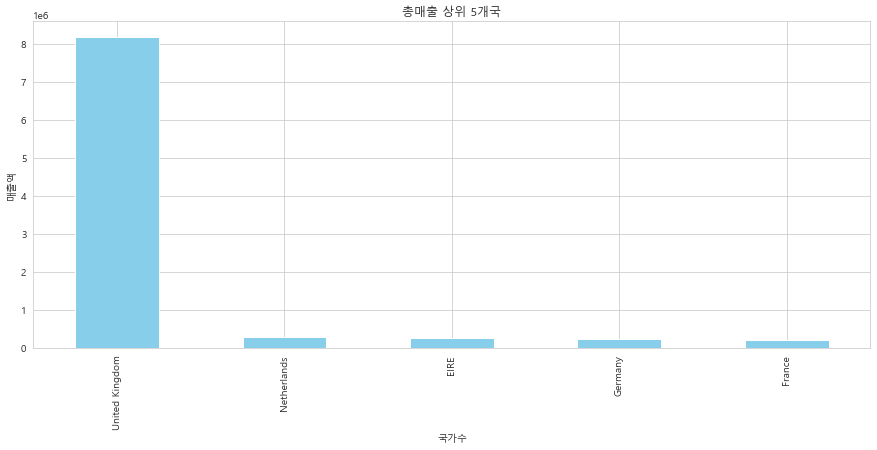

In [53]:
plt.figure(figsize=(15,6))
top_countries.head(5).plot(kind='bar',color='skyblue')
plt.title('총매출 상위 5개국')
plt.ylabel('매출액')

In [54]:
top5_not=df2.groupby('국가수')['반품건수'].sum().sort_values(ascending=False)

Text(0.5, 1.0, '국가별 반품률')

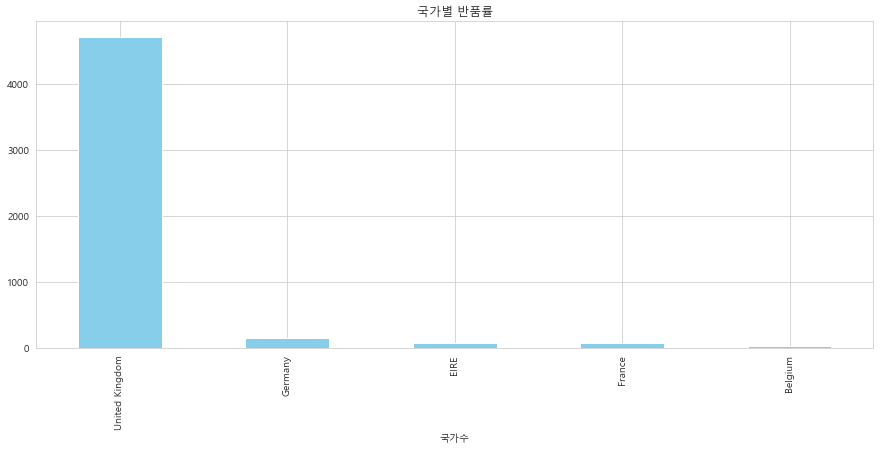

In [55]:
plt.figure(figsize=(15,6))
top5_not.head(5).plot(kind='bar',color='skyblue')
plt.title('국가별 반품률')

In [56]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,0
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,0
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,0
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,0
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,0
...,...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,1
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,1
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,1
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom,1


In [57]:
# 1. 반품된 수량만 추출하여 양수로 저장 (반품이 아니면 0)
df2['반품수량'] = df2.apply(lambda x: abs(x['구매수량수']) if x['반품건수'] == 1 else 0, axis=1)

# 2. 결과 확인
df2.head()

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수,반품수량
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,0,0
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,0,0
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,0,0
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,0,0
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,0,0


In [58]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수,반품수량
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,0,0
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,0,0
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,0,0
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,0,0
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,0,0
...,...,...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,1,80995
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,1,23
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,1,1
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom,1,5


In [59]:
# 국가별로 반품 건수와 반품 수량 합계 구하기
country_analysis = df2.groupby('국가수').agg({
    '반품건수': 'sum',
    '반품수량': 'sum',
    '총매출액수': 'sum'
}).sort_values(by='반품수량', ascending=False)

print(country_analysis.head(5))

                반품건수    반품수량        총매출액수
국가수                                      
United Kingdom  4708  469990  8187806.364
EIRE              72    4810   263276.820
Germany          146    1815   221698.210
France            69    1624   197403.900
USA                2    1424     1730.920


In [60]:
country_analysis.head(5)

,반품건수,반품수량,총매출액수
국가수,,,
United Kingdom,4708,469990,8187806.364
EIRE,72,4810,263276.820
Germany,146,1815,221698.210
France,69,1624,197403.900
USA,2,1424,1730.920


In [61]:
country_analysis=country_analysis.reset_index()

<AxesSubplot:xlabel='국가수', ylabel='반품수량'>

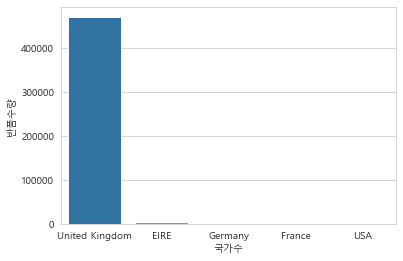

In [62]:
sns.barplot(data=country_analysis.head(5),x='국가수',y='반품수량')

<AxesSubplot:xlabel='국가수', ylabel='반품건수'>

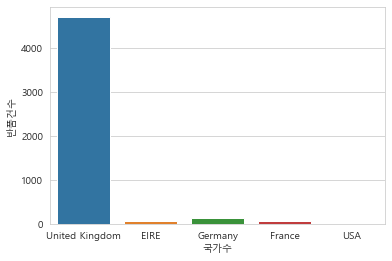

In [63]:
sns.barplot(data=country_analysis.head(5),x='국가수',y='반품건수')

In [64]:
df

,주문ID,상품ID,상품명,구매수량,주문일시,단가,고객ID,국가,sales,주문일
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09


In [65]:
# 1. 반품 데이터(수량이 음수)만 필터링
df_returns = df[df['구매수량'] < 0].copy()

# 2. 반품 수량을 양수로 변환
df_returns['반품수량'] = df_returns['구매수량'].abs()

# 3. 상품명별로 반품 수량 합계 계산
top_problem_products = df_returns.groupby(['상품ID', '상품명'])['반품수량'].sum().sort_values(ascending=False).head(5)

print("--- 반품 수량 상위 5개 상품 ---")
print(top_problem_products)

--- 반품 수량 상위 5개 상품 ---
상품ID   상품명                                
23843  PAPER CRAFT , LITTLE BIRDIE            80995
23166  MEDIUM CERAMIC TOP STORAGE JAR         74494
23005  printing smudges/thrown away           19200
84347  ROTATING SILVER ANGELS T-LIGHT HLDR     9376
23003  Printing smudges/thrown away            9058
Name: 반품수량, dtype: int64


In [66]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수,반품수량
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,0,0
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,0,0
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,0,0
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,0,0
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,0,0
...,...,...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,1,80995
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,1,23
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,1,1
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom,1,5


In [67]:
df2['주문일']=pd.to_datetime(df2['주문일'])

In [68]:
# 주문일 컬럼을 datetime 형식으로 확실히 변환 후 '연-월' 추출
df2['주문월'] = df2['주문일'].dt.to_period('M')

# 월별 매출 및 반품 현황 요약
monthly_summary = df2.groupby('주문월').agg({
    '총매출액수': 'sum',
    '반품건수': 'sum'
})

In [69]:
df2

,주문ID,상품id,상품명수,구매수량수,주문일,총매출액수,국가수,반품건수,반품수량,주문월
0,536365,7,7,40,2010-12-01,139.12,United Kingdom,0,0,2010-12
1,536366,2,2,12,2010-12-01,22.20,United Kingdom,0,0,2010-12
2,536367,12,12,83,2010-12-01,278.73,United Kingdom,0,0,2010-12
3,536368,4,4,15,2010-12-01,70.05,United Kingdom,0,0,2010-12
4,536369,1,1,3,2010-12-01,17.85,United Kingdom,0,0,2010-12
...,...,...,...,...,...,...,...,...,...,...
25895,C581484,1,1,-80995,2011-12-09,-168469.60,United Kingdom,1,80995,2011-12
25896,C581490,2,2,-23,2011-12-09,-32.53,United Kingdom,1,23,2011-12
25897,C581499,1,1,-1,2011-12-09,-224.69,United Kingdom,1,1,2011-12
25898,C581568,1,1,-5,2011-12-09,-54.75,United Kingdom,1,5,2011-12


In [70]:
monthly_summary

,총매출액수,반품건수
주문월,,
2010-12,748957.020,396
2011-01,560000.260,356
2011-02,498062.650,267
2011-03,683267.080,452
2011-04,493207.121,426
2011-05,723333.510,431
2011-06,691123.120,436
2011-07,681300.111,387
2011-08,682680.510,328


In [71]:
monthly_summary=monthly_summary.reset_index()

In [72]:
monthly_summary['주문월']=monthly_summary['주문월'].astype(str)

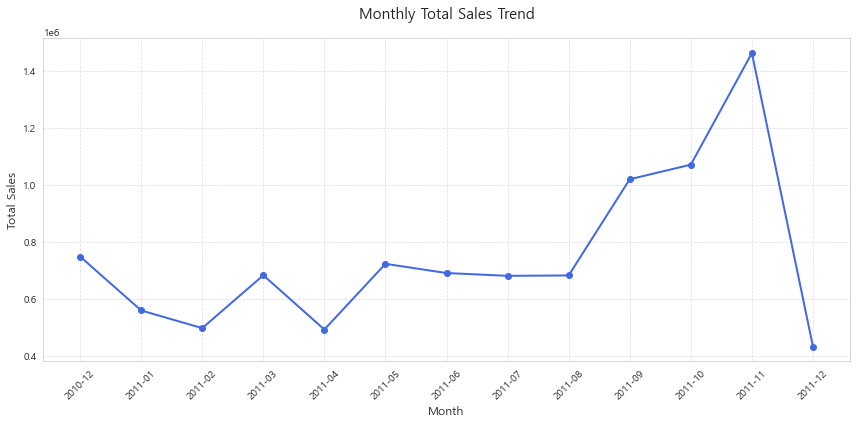

In [73]:
import matplotlib.pyplot as plt

# 1. 데이터 집계부터 다시 시작 (인덱스 꼬임 방지)
monthly_summary = df2.groupby('주문월').agg({
    '총매출액수': 'sum',
    '반품건수': 'sum'
})

# 2. 인덱스를 컬럼으로 변환 (딱 한 번만 실행)
monthly_summary = monthly_summary.reset_index()

# 3. 시각화를 위해 문자열로 변환
monthly_summary['주문월'] = monthly_summary['주문월'].astype(str)

# 4. Matplotlib으로 그래프 그리기 (.values 사용하여 ValueError 방지)
plt.figure(figsize=(12, 6))
plt.plot(monthly_summary['주문월'].values, monthly_summary['총매출액수'].values, 
         marker='o', color='royalblue', linestyle='-', linewidth=2)

# 5. 그래프 꾸미기
plt.title('Monthly Total Sales Trend', fontsize=15, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

In [74]:
df2.isnull().sum()

주문ID     0
상품id     0
상품명수     0
구매수량수    0
주문일      0
총매출액수    0
국가수      0
반품건수     0
반품수량     0
주문월      0
dtype: int64

In [75]:
# 1. 'guest'가 아닌 실제 회원들의 데이터만 추출하여 분석 진행
# 사용자님께서 'guest'로 채우신 데이터를 활용하여 필터링합니다.
rfm_member = df[df['고객ID'] != 'guest'].copy()

# 2. 기준 날짜 설정
reference_date = rfm_member['주문일'].max() + pd.Timedelta(days=1)

# 3. 회원별 RFM 집계
rfm = rfm_member.groupby('고객ID').agg({
    '주문일': lambda x: (reference_date - x.max()).days, # Recency
    '주문ID': 'nunique',                             # Frequency
    'sales': 'sum'                                   # Monetary
})

# 4. 컬럼명 변경 및 인덱스 초기화
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()

print("--- 회원별 RFM 분석 결과 (상위 5명) ---")
print(rfm.sort_values(by='Monetary', ascending=False).head(5))

--- 회원별 RFM 분석 결과 (상위 5명) ---
         고객ID  Recency  Frequency   Monetary
1703  14646.0        2         77  279489.02
4233  18102.0        1         62  256438.49
3758  17450.0        9         55  187482.17
1895  14911.0        2        248  132572.62
55    12415.0       25         26  123725.45


In [76]:
# 1. 각 지표를 5개 구간으로 나누어 점수(1~5) 부여
# Recency는 낮을수록 좋은 것이므로 labels를 [5, 4, 3, 2, 1]로 역순 배치합니다.
rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# 2. 점수 합계 계산
rfm['RFM_score'] = rfm['R_score'].astype(int) + rfm['F_score'].astype(int) + rfm['M_score'].astype(int)

In [77]:
# 점수대에 따른 등급 정의 함수
def get_segment(score):
    if score >= 14: return 'VIP'
    elif score >= 10: return '우수 고객'
    elif score >= 7: return '일반 고객'
    else: return '이탈 위험'

rfm['Segment'] = rfm['RFM_score'].apply(get_segment)

In [78]:
rfm

,고객ID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346.0,326,2,0.00,1,2,1,4,이탈 위험
1,12347.0,3,7,4310.00,5,4,5,14,VIP
2,12348.0,76,4,1797.24,2,3,4,9,일반 고객
3,12349.0,19,1,1757.55,4,1,4,9,일반 고객
4,12350.0,311,1,334.40,1,1,2,4,이탈 위험
...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,1,180.60,1,2,1,4,이탈 위험
4368,18281.0,181,1,80.82,1,2,1,4,이탈 위험
4369,18282.0,8,3,176.60,5,3,1,9,일반 고객
4370,18283.0,4,16,2094.88,5,5,5,15,VIP


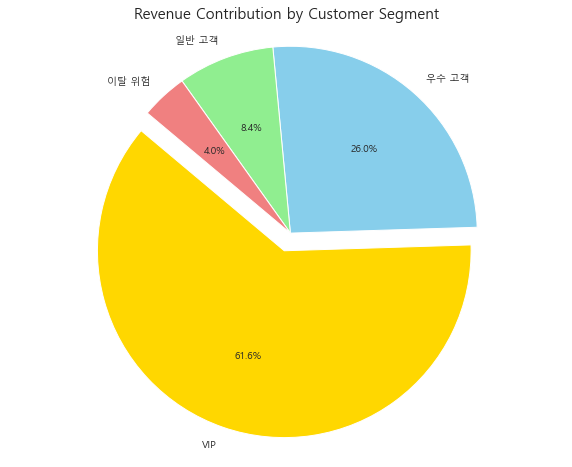

In [79]:
import matplotlib.pyplot as plt

# 1. RFM 점수를 바탕으로 고객 등급(Segment) 분류 함수 정의
def get_segment(score):
    if score >= 14: return 'VIP'           # 합계 14점 이상: 최상위 고객
    elif score >= 10: return '우수 고객'    # 합계 10~13점: 충성도 높은 고객
    elif score >= 7: return '일반 고객'     # 합계 7~9점: 평범한 구매 패턴
    else: return '이탈 위험'                # 합계 6점 이하: 오랫동안 구매가 없는 고객

# 2. rfm 데이터프레임의 각 행에 등급 분류 함수 적용
rfm['Segment'] = rfm['RFM_score'].apply(get_segment)

# 3. 등급별(Segment)로 Monetary(매출액)의 합계 계산
# 이 작업은 각 등급이 우리 매장에 얼마나 돈을 썼는지 요약합니다.
segment_revenue = rfm.groupby('Segment')['Monetary'].sum()

# 4. 시각화 호환성을 위해 매출이 높은 순서대로 등급 정렬
# VIP가 가장 먼저 보이도록 내림차순 정렬합니다.
segment_revenue = segment_revenue.sort_values(ascending=False)

# 5. 파이 차트 그리기
plt.figure(figsize=(10, 8)) # 그래프 크기 설정

# segment_revenue.values: 매출액 수치 데이터 전달
# labels=segment_revenue.index: 등급 이름(VIP 등)을 라벨로 사용
# autopct='%1.1f%%': 차트 위에 백분율 표시 (소수점 첫째 자리까지)
# startangle=140: 차트의 시작 각도를 조절하여 보기 좋게 배치
# colors: 각 등급별 색상 지정 (강조하고 싶은 VIP는 진한 색으로)
plt.pie(segment_revenue.values, 
        labels=segment_revenue.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=['gold', 'skyblue', 'lightgreen', 'lightcoral'],
        explode=[0.1, 0, 0, 0]) # 가장 큰 비중인 VIP 조각을 살짝 떼어서 강조

# 6. 차트 제목 및 레이아웃 설정
plt.title('Revenue Contribution by Customer Segment', fontsize=15)
plt.axis('equal') # 파이 차트가 찌그러지지 않고 완벽한 원이 되도록 설정
plt.show() # 그래프 출력